In [23]:
from QUANTAXIS.QAARP.QAStrategy import QA_Strategy
from QUANTAXIS.QAARP.QAAccount import  QA_Account
from QUANTAXIS.QAUtil.QAParameter import (AMOUNT_MODEL, MARKET_TYPE,
                                          FREQUENCE, ORDER_DIRECTION,
                                          ORDER_MODEL,RUNNING_ENVIRONMENT)
import QUANTAXIS as QA

import random


In [24]:
class MAMINT0Strategy(QA_Account):
    def __init__(self,init_hold={'000001':10000,'000002':20000,'000004':40000}):
        super().__init__(init_hold=init_hold)
        self.running_environment=RUNNING_ENVIRONMENT.TZERO
        self.frequence = FREQUENCE.FIFTEEN_MIN
        self.market_type = MARKET_TYPE.STOCK_CN
        self.account_cookie ='LCW_T0'

    def on_bar(self, event):
        try:
            for item in event.market_data.code:

                print(self.current_time)
                print(self.datetime)
                print('=====SELL_AVAILABLE======')
                print(self.sell_available)
                print('=====HOLD_AVAILABLE======')
                print(self.hold_available)
                print('=====BUY_AVAILABLE=======')
                print(self.buy_available)
                if self.sell_available.get(item, 0) > 0:
                    event.send_order(account_id=self.account_cookie,
                                        amount=int(self.sell_available[item]*random.random()/100)*100, amount_model=AMOUNT_MODEL.BY_AMOUNT,
                                        time=self.current_time, code=item, price=0,
                                        order_model=ORDER_MODEL.MARKET, towards=ORDER_DIRECTION.SELL,
                                        market_type=self.market_type, frequence=self.frequence,
                                        broker_name=self.broker
                                        )
                if random.random()>0.5:
                    event.send_order(account_id=self.account_cookie,
                                        amount=random.randint(1,50)*100, amount_model=AMOUNT_MODEL.BY_AMOUNT,
                                        time=self.current_time, code=item, price=0,
                                        order_model=ORDER_MODEL.MARKET, towards=ORDER_DIRECTION.BUY,
                                        market_type=self.market_type, frequence=self.frequence,
                                        broker_name=self.broker)
        except:
            pass

In [26]:
class MAMINT0Strategy1(QA_Account):
    def __init__(self,init_hold={'000001':10000,'000004':20000,'000008':40000}):
        super().__init__(init_hold=init_hold)
        self.running_environment=RUNNING_ENVIRONMENT.TZERO
        self.frequence = FREQUENCE.FIFTEEN_MIN
        self.market_type = MARKET_TYPE.STOCK_CN
        self.account_cookie ='LCW_T01'

    def on_bar(self, event):
        try:
            for item in event.market_data.code:

                print(self.current_time)
                print(self.datetime)
                print('=====SELL_AVAILABLE======')
                print(self.sell_available)
                print('=====HOLD_AVAILABLE======')
                print(self.hold_available)
                print('=====BUY_AVAILABLE=======')
                print(self.buy_available)
                if self.sell_available.get(item, 0) > 0:
                    event.send_order(account_id=self.account_cookie,
                                        amount=int(self.sell_available[item]*random.random()/100)*100, amount_model=AMOUNT_MODEL.BY_AMOUNT,
                                        time=self.current_time, code=item, price=0,
                                        order_model=ORDER_MODEL.MARKET, towards=ORDER_DIRECTION.SELL,
                                        market_type=self.market_type, frequence=self.frequence,
                                        broker_name=self.broker
                                        )
                if random.random()>0.5:
                    event.send_order(account_id=self.account_cookie,
                                        amount=random.randint(1,50)*100, amount_model=AMOUNT_MODEL.BY_AMOUNT,
                                        time=self.current_time, code=item, price=0,
                                        order_model=ORDER_MODEL.MARKET, towards=ORDER_DIRECTION.BUY,
                                        market_type=self.market_type, frequence=self.frequence,
                                        broker_name=self.broker)
        except:
            pass

In [27]:
account1=MAMINT0Strategy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
account2=MAMINT0Strategy1()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
user=QA.QA_User(user_cookie='LCW')

In [30]:
account2

< QA_Account LCW_T01>

In [31]:
port=user.new_portfolio(portfolio_cookie='LCW_t0')

In [32]:
port.add_account(account1)

In [33]:
port.add_account(account2)

In [34]:
import pandas as pd

In [36]:
port.init_hold_table

,,amount
code,account_cookie,
000001,LCW_T0,10000
000002,LCW_T0,20000
000004,LCW_T0,40000
000001,LCW_T01,10000
000004,LCW_T01,20000
000008,LCW_T01,40000


In [13]:
#pd.concat([account.init_hold_with_account for account in list(port.accounts.values())]).groupby('code').sum()

In [37]:

from QUANTAXIS.QAARP.QARisk import QA_Risk
from QUANTAXIS.QAARP.QAUser import QA_User
from QUANTAXIS.QABacktest.QABacktest import QA_Backtest
from QUANTAXIS.QAUtil.QALogs import QA_util_log_info
from QUANTAXIS.QAUtil.QAParameter import FREQUENCE, MARKET_TYPE


class Backtest(QA_Backtest):
    '''
    多线程模式回测示例

    '''

    def __init__(self, market_type, frequence, start, end, code_list, commission_fee):
        super().__init__(market_type,  frequence, start, end, code_list, commission_fee)
        self.user = QA_User()
        t0strategy=MAMINT0Strategy()
        # maminstrategy.reset_assets(1000)
        # self.portfolio, self.account = self.user.register_account(mastrategy)
        self.user = QA_User(user_cookie='user_admin')
        self.portfolio = self.user.new_portfolio('folio_admin')
        self.portfolio, self.account = self.user.register_account(t0strategy)

    def after_success(self):
        QA_util_log_info(self.account.history_table)
        risk = QA_Risk(self.account, benchmark_code='000300',
                       benchmark_type=MARKET_TYPE.INDEX_CN)

        print(risk().T)

        self.account.save()
        risk.save()

In [38]:

backtest = Backtest(market_type=MARKET_TYPE.STOCK_CN,
                    frequence=FREQUENCE.FIFTEEN_MIN,
                    start='2017-11-01',
                    end='2017-11-05',
                    code_list=['000001','000002','000004'],
                    commission_fee=0.00015)
backtest.start_market()

backtest.run()
backtest.stop()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  This is separate from the ipykernel package so we can avoid doing imports until


===== SETTLED None =====
2017-11-01 09:45:00
None
=====SELL_AVAILABLE======
code
000001    10000
000002    20000
000004    40000
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
Series([], Name: amount, dtype: float64)
=====BUY_AVAILABLE=======
code
000001    10000
000002    20000
000004    40000
Name: amount, dtype: int64
2017-11-01 09:45:00
2017-11-01 09:45:00
=====SELL_AVAILABLE======
code
000001     4700
000002    20000
000004    40000
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
Series([], Name: amount, dtype: float64)
=====BUY_AVAILABLE=======
code
000001     9900
000002    20000
000004    40000
Name: amount, dtype: int64
2017-11-01 09:45:00
2017-11-01 09:45:00
=====SELL_AVAILABLE======
code
000001     4700
000002     1000
000004    40000
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
Series([], Name: amount, dtype: float64)
=====BUY_AVAILABLE=======
code
000001     9900
000002    20000
000004    40000
Name: amount, dtype: int64
< QA_Order datetime:2017-11-01 09

< QA_Order datetime:2017-11-01 10:45:00 code:000002 amount:2100 price:29.72 towards:1 btype:stock_cn order_id:Order_DTWeOhRG account:LCW_T0 status:300 >2017-11-01 10:45:00

=====SELL_AVAILABLE======< QA_Order datetime:2017-11-01 10:45:00 code:000004 amount:400 price:23.64 towards:-1 btype:stock_cn order_id:Order_xFjGpEgu account:LCW_T0 status:300 >

code
000001     300
000002     100
000004    1300
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
code
000001    -1200.0
000002   -17800.0
000004   -32300.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     1500
000002    17900
000004    33600
Name: amount, dtype: int64
ERROR : amount=0
2017-11-01 11:00:00
2017-11-01 11:00:00
=====SELL_AVAILABLE======
code
000001     300
000002     100
000004    1300
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
code
000001    -1200.0
000002   -17800.0
000004   -32300.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     1300
000002    17900
000004    3360

=====BUY_AVAILABLE=======
code
000001     1300
000002    12600
000004    24100
Name: amount, dtype: int64
ERROR : amount=0
2017-11-01 13:45:00
2017-11-01 13:30:00
=====SELL_AVAILABLE======
code
000001    100
000002    100
000004    100
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
code
000001    -1200.0
000002   -12500.0
000004   -24000.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     1300
000002    12600
000004    24100
Name: amount, dtype: int64
ERROR : amount=0
2017-11-01 14:00:00
2017-11-01 13:30:00
=====SELL_AVAILABLE======
code
000001    100
000002    100
000004    100
Name: amount, dtype: int64
=====HOLD_AVAILABLE======
code
000001    -1200.0
000002   -12500.0
000004   -24000.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     1300
000002    12600
000004    24100
Name: amount, dtype: int64
ERROR : amount=0
2017-11-01 14:00:00
2017-11-01 14:00:00
=====SELL_AVAILABLE======
code
000001    100
000002    100
000004    100
Name: amou

Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001    10000.0
000002    20000.0
000004    40000.0
Name: amount, dtype: float64
2017-11-02 09:45:00
2017-11-02 09:45:00
=====SELL_AVAILABLE======
code
000001     4000.0
000002    10700.0
000004    40000.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    0.0
000002    0.0
000004    0.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001    10000.0
000002    20000.0
000004    40000.0
Name: amount, dtype: float64
< QA_Order datetime:2017-11-02 09:45:00 code:000001 amount:6000 price:11.29 towards:-1 btype:stock_cn order_id:Order_zH7MSXpu account:LCW_T0 status:300 >
< QA_Order datetime:2017-11-02 09:45:00 code:000002 amount:9300 price:28.81 towards:-1 btype:stock_cn order_id:Order_5TFtlRej account:LCW_T0 status:300 >2017-11-02 10:00:00

2017-11-02 09:45:00< QA_Order datetime:2017-11-02 09:45:00 code:000004 amount:24000 price:23.52 towards:-1 btype:stock_cn order_id:Order_fqd1pceZ account:LCW_T

Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -3300.0
000002   -14900.0
000004   -27000.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     3500.0
000002    15000.0
000004    31900.0
Name: amount, dtype: float64
2017-11-02 11:00:00
2017-11-02 11:00:00
=====SELL_AVAILABLE======
code
000001     100.0
000002     100.0
000004    4900.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -3300.0
000002   -14900.0
000004   -27000.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2500.0
000002    15000.0
000004    31900.0
Name: amount, dtype: float64
ERROR : amount=0
2017-11-02 11:00:00
2017-11-02 11:00:00
=====SELL_AVAILABLE======
code
000001     100.0
000002     100.0
000004    4900.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -3300.0
000002   -14900.0
000004   -27000.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2500.0
000002    12000.0
000004    31900

=====BUY_AVAILABLE=======
code
000001     2500.0
000002     8900.0
000004    30400.0
Name: amount, dtype: float64
ERROR : amount=0
< QA_Order datetime:2017-11-02 13:45:00 code:000004 amount:1000 price:23.2 towards:1 btype:stock_cn order_id:Order_1FTIPLJo account:LCW_T0 status:300 >
2017-11-02 14:00:00
2017-11-02 13:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -2400.0
000002    -8800.0
000004   -29300.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2500.0
000002     8900.0
000004    29400.0
Name: amount, dtype: float64
ERROR : amount=0
2017-11-02 14:00:00
2017-11-02 13:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -2400.0
000002    -8800.0
000004   -29300.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2500.0
000002     89

2017-11-03 09:45:00
=====SELL_AVAILABLE======
code
000001     8600.0
000002     8500.0
000004    40000.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    0.0
000002    0.0
000004    0.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     9200.0
000002    20000.0
000004    40000.0
Name: amount, dtype: float64
< QA_Order datetime:2017-11-03 09:45:00 code:000001 amount:1400 price:11.44 towards:-1 btype:stock_cn order_id:Order_FJhnPHto account:LCW_T0 status:300 >
< QA_Order datetime:2017-11-03 09:45:00 code:000001 amount:800 price:11.44 towards:1 btype:stock_cn order_id:Order_nQLZy2SP account:LCW_T0 status:300 >
2017-11-03 10:00:00< QA_Order datetime:2017-11-03 09:45:00 code:000002 amount:11500 price:29.42 towards:-1 btype:stock_cn order_id:Order_dUL1x4hH account:LCW_T0 status:300 >

2017-11-03 09:45:00
< QA_Order datetime:2017-11-03 09:45:00 code:000004 amount:8700 price:23.62 towards:-1 btype:stock_cn order_id:Order_rlhL0j7X account:LCW_T0 status:3

< QA_Order datetime:2017-11-03 10:45:00 code:000004 amount:3700 price:23.48 towards:-1 btype:stock_cn order_id:Order_jD6taisq account:LCW_T0 status:300 >2017-11-03 10:45:00

< QA_Order datetime:2017-11-03 10:45:00 code:000004 amount:1300 price:23.48 towards:1 btype:stock_cn order_id:Order_NFy3UDLa account:LCW_T0 status:300 >=====SELL_AVAILABLE======

code
000001     100.0
000002    2100.0
000004     300.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -6800.0
000002    -3700.0
000004   -33900.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     6900.0
000002     5800.0
000004    34200.0
Name: amount, dtype: float64
ERROR : amount=0
2017-11-03 11:00:00
2017-11-03 11:00:00
=====SELL_AVAILABLE======
code
000001     100.0
000002    2100.0
000004     300.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -6800.0
000002    -3700.0
000004   -33900.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2700.0
000

Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2700.0
000002     1500.0
000004    29800.0
Name: amount, dtype: float64
ERROR : amount=0
T0交易买入超出限额
ERROR : amount=0
2017-11-03 13:45:00
2017-11-03 13:30:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    300.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -2600.0
000002    -1200.0
000004   -29700.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2700.0
000002     1500.0
000004    29800.0
Name: amount, dtype: float64
T0交易买入超出限额
ERROR : amount=0
2017-11-03 13:45:00
2017-11-03 13:45:00
=====SELL_AVAILABLE======
code
000001    100.0
000002    100.0
000004    100.0
Name: amount, dtype: float64
=====HOLD_AVAILABLE======
code
000001    -2600.0
000002    -1200.0
000004   -29700.0
Name: amount, dtype: float64
=====BUY_AVAILABLE=======
code
000001     2700.0
000002     1500.0
000004    29800.0
Name: amount, dtype: float64
ERROR : amount=0
< QA_Order date

QUANTAXIS>>                 datetime    code  price   amount        order_id  \
0    2017-11-01 09:45:00  000001  11.53  -5300.0  Order_Zbfl6UVs   
1    2017-11-01 09:45:00  000001  11.53    100.0  Order_6epSy5Fh   
2    2017-11-01 09:45:00  000002  29.34 -19000.0  Order_oBw27n8A   
3    2017-11-01 09:45:00  000004  23.47 -11600.0  Order_aZENV1Pz   
4    2017-11-01 10:00:00  000001  11.48  -4000.0  Order_Lxlm4kXF   
5    2017-11-01 10:00:00  000001  11.48   3400.0  Order_BOm4zlT5   
6    2017-11-01 10:00:00  000002  30.03   -100.0  Order_CHWMDGiU   
7    2017-11-01 10:00:00  000004  23.61 -22900.0  Order_Zk7N35Ka   
8    2017-11-01 10:15:00  000001  11.54   -300.0  Order_xu5BVLOo   
9    2017-11-01 10:15:00  000001  11.54   5000.0  Order_nlOICawK   
10   2017-11-01 10:15:00  000002  30.28   -300.0  Order_8uzIoMqO   
11   2017-11-01 10:15:00  000004  23.75  -3500.0  Order_NdbgByI5   
12   2017-11-01 10:15:00  000004  23.75   2400.0  Order_ln75FyVS   
13   2017-11-01 10:30:00  000002  30

< QA_Order datetime:2017-11-03 15:00:00 code:000004 amount:1900 price:23.16 towards:1 btype:stock_cn order_id:Order_Ems72fVv account:LCW_T0 status:300 >


                              0
account_cookie           LCW_T0
alpha                      0.59
annualize_return           0.51
benchmark_code           000300
beta                          1
bm_annualizereturn        -0.08
bn_profit                    -0
init_cash            1000000.00
last_assets          1000529.17
max_dropback               0.01
portfolio_cookie    folio_admin
profit                        0
sharpe                        2
time_gap                      3
user_cookie          user_admin
volatility                 0.23


In [44]:
backtest.account.hold_available

code
000001    -1600.0
000002     -900.0
000004   -12700.0
Name: amount, dtype: float64

In [54]:
backtest.account.orders.queue_df

,account_cookie,amount,amount_model,callback,code,commission_coeff,date,datetime,frequence,market_type,...,price,sending_time,status,strategy,tax_coeff,towards,trade_id,transact_time,type,user
order_id,,,,,,,,,,,,,,,,,,,,,
Order_Zbfl6UVs,LCW_T0,5300,by_amount,<bound method QA_Account.receive_deal of < QA_...,000001,0.00025,2017-11-01,2017-11-01 09:45:00,15min,stock_cn,...,11.46,2017-11-01 09:45:00,300,None,0.0015,-1,None,None,stock_cn,None
Order_6epSy5Fh,LCW_T0,100,by_amount,<bound method QA_Account.receive_deal of < QA_...,000001,0.00025,2017-11-01,2017-11-01 09:45:00,15min,stock_cn,...,11.46,2017-11-01 09:45:00,300,None,0.0015,1,None,None,stock_cn,None
Order_oBw27n8A,LCW_T0,19000,by_amount,<bound method QA_Account.receive_deal of < QA_...,000002,0.00025,2017-11-01,2017-11-01 09:45:00,15min,stock_cn,...,29.75,2017-11-01 09:45:00,300,None,0.0015,-1,None,None,stock_cn,None
Order_aZENV1Pz,LCW_T0,11600,by_amount,<bound method QA_Account.receive_deal of < QA_...,000004,0.00025,2017-11-01,2017-11-01 09:45:00,15min,stock_cn,...,23.41,2017-11-01 09:45:00,300,None,0.0015,-1,None,None,stock_cn,None
Order_Lxlm4kXF,LCW_T0,4000,by_amount,<bound method QA_Account.receive_deal of < QA_...,000001,0.00025,2017-11-01,2017-11-01 10:00:00,15min,stock_cn,...,11.53,2017-11-01 10:00:00,300,None,0.0015,-1,None,None,stock_cn,None
Order_BOm4zlT5,LCW_T0,3400,by_amount,<bound method QA_Account.receive_deal of < QA_...,000001,0.00025,2017-11-01,2017-11-01 10:00:00,15min,stock_cn,...,11.53,2017-11-01 10:00:00,300,None,0.0015,1,None,None,stock_cn,None
Order_CHWMDGiU,LCW_T0,100,by_amount,<bound method QA_Account.receive_deal of < QA_...,000002,0.00025,2017-11-01,2017-11-01 10:00:00,15min,stock_cn,...,30.04,2017-11-01 10:00:00,300,None,0.0015,-1,None,None,stock_cn,None
Order_Zk7N35Ka,LCW_T0,22900,by_amount,<bound method QA_Account.receive_deal of < QA_...,000004,0.00025,2017-11-01,2017-11-01 10:00:00,15min,stock_cn,...,23.65,2017-11-01 10:00:00,300,None,0.0015,-1,None,None,stock_cn,None
Order_xu5BVLOo,LCW_T0,300,by_amount,<bound method QA_Account.receive_deal of < QA_...,000001,0.00025,2017-11-01,2017-11-01 10:15:00,15min,stock_cn,...,11.53,2017-11-01 10:15:00,300,None,0.0015,-1,None,None,stock_cn,None


In [45]:
risk=QA.QA_Risk(backtest.account)

In [46]:
risk.profit_construct

{'total_buyandsell': 10402.0,
 'total_tax': -7352.74,
 'total_commission': -2520.09,
 'total_profit': 529.17}

In [47]:
backtest.account.init_assets

{'cash': 1000000, 'hold': {'000001': 10000, '000002': 20000, '000004': 40000}}

In [48]:
backtest.account.daily_hold

,code,000001,000002,000004
date,account_cookie,,,
2017-11-01,LCW_T0,0.0,0.0,0.0
2017-11-02,LCW_T0,0.0,0.0,0.0
2017-11-03,LCW_T0,-1600.0,-900.0,-12700.0


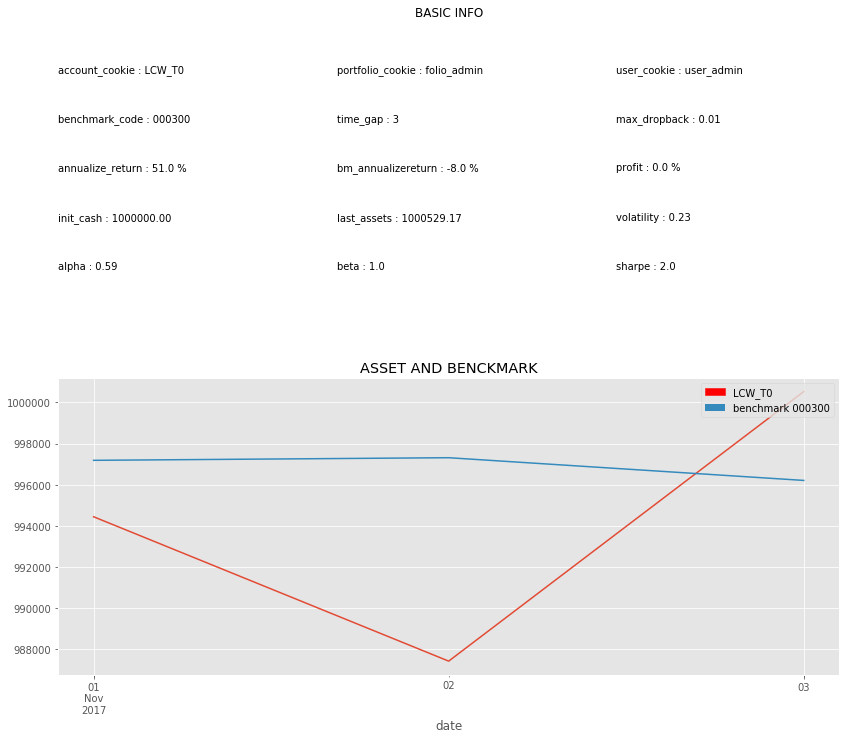

In [49]:
risk.plot_assets_curve()